In [1]:
    import sys
sys.path.append("../../mre")
import os

import pyfits
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from suite2p import dcnv
from matplotlib import colors

directory = '../data/Whisker stim/suite2p/plane0/'
data_trials = np.load('../data/Whisker stim/Whisker_stim_start_frames.npy')
data_stim = np.load('../data/Whisker stim/Whisker_stim_times.npy')
print(data_stim.shape)
F_adam = np.load('../data/Whisker stim/Whisker_stim_neuCorrected_F.npy')
print(F_adam.shape)
iscell = np.load(directory + "iscell.npy")
F = np.load(directory + "F.npy")
Fneu = np.load(directory + "Fneu.npy")
Fc = F - 1 * Fneu
mask_iscell = iscell[:, 1] > 0.5
Fc = Fc[mask_iscell, :]
print(Fc.shape)

/home/jdehning/miniconda3/lib/python3.7/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


(25,)
(123, 8664)
(295, 8664)


INFO     Loaded mrestimator v0.1.4, writing to /tmp/mre_jdehning/


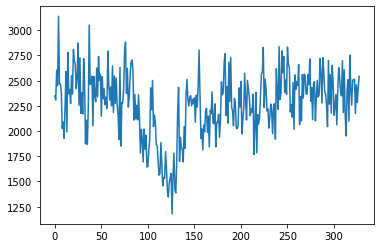

In [2]:
import mrestimator as mre

def make_trials(act_mat, beg_bef = 100):
    min_length = np.min(np.diff(data_trials))
    act = np.empty((act_mat.shape[0], len(data_trials), min_length))
    for i in range(len(data_trials)):
        stim_beg = data_trials[i]
        act[:, i ,:] = act_mat[:, stim_beg-beg_bef: stim_beg-beg_bef+min_length] 
    return act
from first_tests import deconvolve
spks = deconvolve(Fc, fs=30, tau=1.5)
spks_adam = deconvolve(F_adam, fs=30, tau=1.5)

spks_trials = make_trials(spks)
plt.plot(np.sum(spks_trials,axis=(0,1)))
spks_trials -= np.mean(spks_trials, axis=1)[:, None, :]






INFO     input_handler() detected ndarray of numbers
INFO     input_handler() returning ndarray with 25 trial(s) and 100 datapoints
INFO     coefficients() with 'trialseparated' method for 25 trials of length 100.
INFO     Bootstrapping 100 replicas
INFO     100 bootstrap replicas done
INFO     Unbound fit to $|A| e^{-k/\tau} + O$
INFO     Finished 5 fit(s)
INFO     Bootstrapping 100 replicas (5 fits each)
INFO     100 Bootstrap replicas done
INFO     Finished fitting the data to f_exponential_offset, mre = 1.000(96), tau = -358.04(2384.06)s, ssres = 0.07647
WARNING  The obtained autocorrelationtime is small compared to the fitrange: tmin~0s, tmax~2s, tau~-358s
WARNING  Consider fitting with smaller 'minstep' and 'maxstep'
INFO     Saving plot to /home/jdehning/ownCloud/studium/two_photon_imaging/source/output_mre/first_test_neuron.pdf
INFO     Saving meta to /home/jdehning/ownCloud/studium/two_photon_imaging/source/output_mre/first_test_neuron.tsv
INFO     full_analysis() done
INFO   

(25, 328)


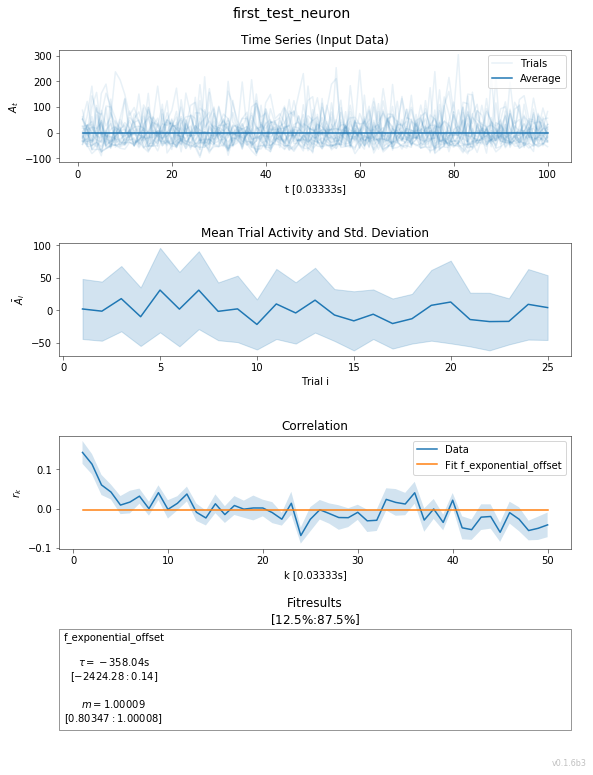

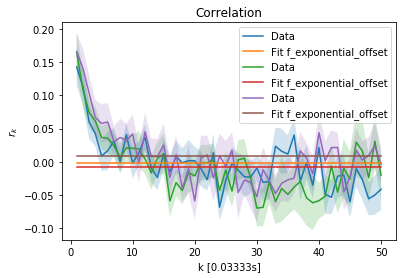

In [19]:
act_sumed = np.sum(spks_trials[:,:,:],axis=0)
act_sumed -= np.mean(act_sumed, axis=0)
print(act_sumed.shape)
plot = mre.full_analysis(act_sumed[:,0:100],
                  targetdir="./output_mre",
                  title="All sumed",
                  dt=1/30,
                  dtunit="s",
                  fitfuncs=["eo"],
                  tmin=0,
                  tmax=50,
                  numboot=100,
                  saveoverview=False,
                  showoverview=True)

mre.full_analysis(act_sumed[:,100:200],
                  targetdir="./output_mre",
                  title="first_test_neuron",
                  dt=1/30,
                  dtunit="s",
                  fitfuncs=["eo"],
                  tmin=0,
                  tmax=50,
                  saveoverview=False,
                  showoverview=False,
                  targetplot=plot.ax)

mre.full_analysis(act_sumed[:,200:300],
                  targetdir="./output_mre",
                  title="first_test_neuron",
                  dt=1/30,
                  dtunit="s",
                  fitfuncs=["eo"],
                  tmin=0,
                  tmax=50,
                  saveoverview=False,
                  showoverview=False,
                  targetplot=plot.ax)

In [41]:
print(spks_trials)
np.argwhere(np.isinf(spks_trials))

[[[-3.71213178e+00 -2.52639528e+00 -3.38413902e+00 ...  3.98129339e+00
   -2.87237721e+00 -1.28613592e+00]
  [-3.71213178e+00 -2.52639528e+00 -3.38413902e+00 ... -7.93664485e+00
   -2.87237721e+00  9.27501463e+00]
  [-3.71213178e+00 -2.52639528e+00 -3.38413902e+00 ...  1.35985991e+01
   -2.87237721e+00 -1.28613592e+00]
  ...
  [-3.71213178e+00 -2.52639528e+00 -3.38413902e+00 ...  2.11113822e+01
   -2.87237721e+00 -1.28613592e+00]
  [-3.71213178e+00  5.67124323e+00 -3.38413902e+00 ...  1.81885554e+01
   -2.87237721e+00 -1.28613592e+00]
  [-3.71213178e+00 -2.24972277e+00  2.12783003e+01 ... -7.93664485e+00
   -2.87237721e+00 -1.28613592e+00]]

 [[-1.11670541e+01  6.22280380e+01 -6.41592010e+00 ...  5.46156325e+01
    2.49020395e+00  1.25073773e+01]
  [-1.11670541e+01  7.12646667e+01 -6.41592010e+00 ... -6.59669739e+00
   -8.08021441e+00 -8.54267532e+00]
  [-2.73575111e+00 -8.24857788e+00 -6.41592010e+00 ...  3.92694716e+01
   -8.08021441e+00  9.02158325e+00]
  ...
  [-1.11670541e+01 -8.2

array([], shape=(0, 3), dtype=int64)

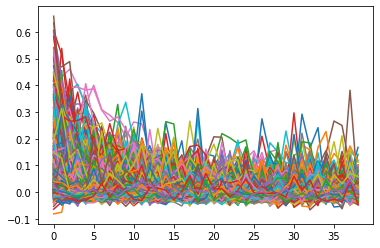

In [3]:
import scipy.optimize

def exp_with_offset(k_arr, tau, A, O):
    return A * np.exp(-k_arr / tau) + O 

k_arr = np.arange(1,40)

def calc_tau(corr_arr):
    maxfev = 1000
    popt, pcov = scipy.optimize.curve_fit(exp_with_offset, xdata=k_arr, ydata=corr_arr,
                                                  p0=np.array([2,0.1,0]),
                                                  bounds=([0.1,0,-1],[40,1,1]), maxfev=maxfev,
                                                  ftol=2e-5, gtol=1e-5, xtol=1e-5, diff_step=2e-6, method="trf")
    return popt[0]

class Calc_Corr():
    def __init__(self, activity_mat, k_arr):
        self.activity_mat = np.array(activity_mat, dtype="float32")
        self.k_arr = k_arr
        self.mean_xy_mat = [None for _ in k_arr]
        self.mean_xplusy_mat = [None for _ in k_arr]
        self.num_trials = len(activity_mat)
        for i, step in enumerate(k_arr):
            x = activity_mat[:, 0:-step]
            y = activity_mat[:, step:]
            mean_xy = np.mean(x * y, axis=1)
            mean_xplusy = np.mean(x + y, axis=1)
            self.mean_xy_mat[i] = mean_xy
            self.mean_xplusy_mat[i] = mean_xplusy
        self.mean_xy_mat = np.array(self.mean_xy_mat)
        self.mean_xplusy_mat = np.array(self.mean_xplusy_mat)

    def calc_corr_arr(self, trials=None):
        if trials is None:
            trials = range(self.num_trials)
        trials = np.array(trials, dtype="int")
        mean = np.mean(self.activity_mat[trials])
        corr_arr = np.empty_like(self.k_arr, dtype="float32")
        variance = np.mean((self.activity_mat[trials] - mean) ** 2)
        for i, step in enumerate(self.k_arr):
            # uses relation (x-mean)(y-mean) = x*y - (x+y)*mean + mean**2
            nominator = np.mean(self.mean_xy_mat[i, trials] -
                                self.mean_xplusy_mat[i, trials] * mean) + mean ** 2
            corr_coeff = nominator / variance
            corr_arr[i] = corr_coeff
        return corr_arr

def make_bootstrapped_taus(spks):
    num_boots = 200
    taus = np.empty((spks.shape[0], num_boots))
    corr_objects = [Calc_Corr(act, k_arr) for act in spks]
    for i in range(num_boots):
        if i == 0:
            index_bootstrap = np.arange(spks.shape[1])
        else:
            index_bootstrap = np.random.choice(spks.shape[1], spks.shape[1])
        for j in range(len(corr_objects)):
            corr_arr = corr_objects[j].calc_corr_arr(trials=index_bootstrap)
            if i == 0:
                plt.plot(corr_arr)
            taus[j,i] = calc_tau(corr_arr)
    return taus

taus_beg = make_bootstrapped_taus(spks_trials[:,:,0:100])
taus_middle = make_bootstrapped_taus(spks_trials[:,:,100:200])
taus_end = make_bootstrapped_taus(spks_trials[:,:,200:300])


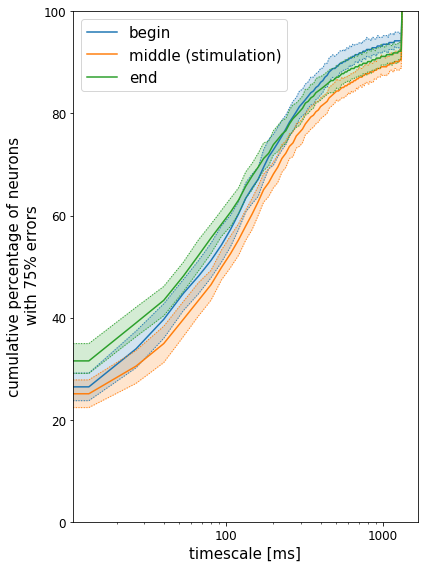

In [10]:
from matplotlib.ticker import ScalarFormatter
    

bins = np.linspace(0,40,100)
f, (ax) = plt.subplots(figsize=(6,8))
def make_cum(taus):
    mean, lower, upper, median = [np.empty(len(bins)) for _ in range(4)]
    for i, bin in enumerate(bins):
        count = np.mean(taus<bin,axis=0)
        mean[i] = count[0]
        lower[i] = np.percentile(count[1:], 12.5)
        upper[i] = np.percentile(count[1:], 87.5)
        median[i] = np.percentile(count[1:],50)
    return median, median*2 -upper, median*2 - lower

def plot_cum(taus, label, color):
    lines = make_cum(taus)
    plt.plot(bins*33, lines[0]*100, label=label, color = color)
    plt.fill_between(bins*33, lines[1]*100, lines[2]*100, alpha=0.2, color = color)
    plt.plot(bins*33, lines[1]*100, color = color, linewidth = 1, linestyle = ':')
    plt.plot(bins*33, lines[2]*100, color = color, linewidth = 1, linestyle = ':')


plot_cum(taus_beg, label='begin', color="tab:blue")
plot_cum(taus_middle, label='middle (stimulation)', color='tab:orange')
plot_cum(taus_end, label='end', color='tab:green')

plt.semilogx()
ax.tick_params(axis='both', which='major', labelsize=12)
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.xlabel('timescale [ms]', fontsize = 15)
plt.ylabel('cumulative percentage of neurons\n with 75% errors', fontsize = 15)
plt.legend(fontsize = 15)
plt.ylim([0,100])
plt.tight_layout()
plt.savefig('Cumulative_timescales.pdf')



    

